<a href="https://colab.research.google.com/github/gizelleguerra/img_processing_practice/blob/main/mnist_digit_calssification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [9]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [10]:
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Oringinally the pixel values in the x values fall in the range of 0 to 255.
# We should scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way
x_train, x_test = x_train / 255.0, x_test / 255.0

## Visualize and Explore Input Dataset

In [14]:
# There are 60,000 images in the training set, each image is represented as 28 x 28 pixels:
x_train.shape

(60000, 28, 28)

In [15]:
# 60k labels for the 60k training images
y_train.shape

(60000,)

In [17]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:
x_test.shape

(10000, 28, 28)

In [18]:
# 10k labels for the 10k test images
y_test.shape

(10000,)

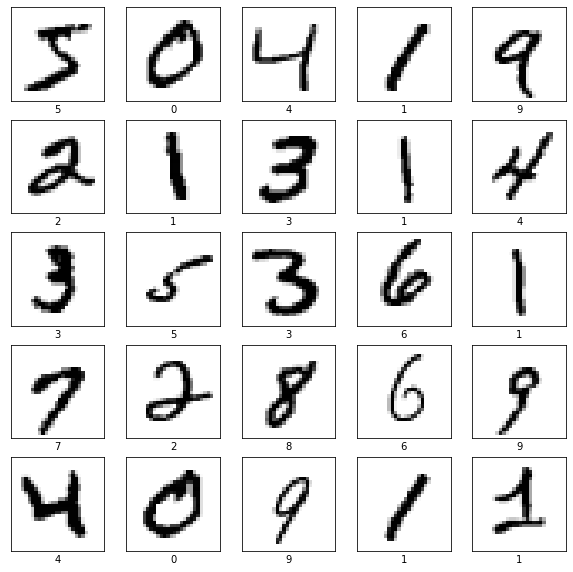

In [13]:
# loop to plot forst 25 images in training data set to check labeling
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [20]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.4482815 ,  0.2762657 , -0.26531824, -0.06558894, -0.12141631,
        -0.3954336 , -0.26258263,  0.606747  , -0.4448842 , -0.30551255]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [21]:
tf.nn.softmax(predictions).numpy()

array([[0.15459076, 0.13016015, 0.07573055, 0.09247246, 0.08745144,
        0.06649098, 0.07593801, 0.18113577, 0.06328293, 0.07274698]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [22]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [23]:
loss_fn(y_train[:1], predictions).numpy()

2.710689

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [24]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3011 - accuracy: 0.9117
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1468 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1095 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9762


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [26]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0732 - accuracy: 0.9777 - 562ms/epoch - 2ms/step


[0.07324466854333878, 0.9776999950408936]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [27]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [28]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.51821461e-08, 3.41709994e-09, 2.74115955e-05, 1.47392188e-04,
        2.24730214e-13, 1.97921665e-07, 2.18958228e-12, 9.99823391e-01,
        5.53797257e-08, 1.52310963e-06],
       [6.07460777e-07, 6.15213576e-05, 9.99929309e-01, 7.31179807e-06,
        3.74508375e-15, 7.20674734e-07, 1.73333632e-07, 5.44102437e-12,
        3.79052068e-07, 1.50193731e-14],
       [4.95806944e-07, 9.98083115e-01, 2.56455678e-04, 2.91248707e-05,
        1.35255614e-04, 5.01674549e-06, 4.69946190e-06, 1.20032846e-03,
        2.84916401e-04, 6.75370813e-07],
       [9.99629617e-01, 6.42638369e-08, 9.24994820e-05, 1.88670651e-06,
        1.61531307e-06, 3.33580429e-05, 2.30033420e-05, 1.63670455e-04,
        2.85032549e-08, 5.41866648e-05],
       [7.30408033e-07, 4.47771431e-10, 6.74066484e-07, 4.80964646e-09,
        9.93292451e-01, 1.35067438e-07, 2.82175097e-05, 1.32849345e-05,
        1.29694490e-06, 6.66328752e-03]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
